# Try to use DPP construct polynomial and reconstruct DPP

$$
K(x,y) = \frac{1}{\pi} \sqrt{\frac{\partial^2 }{\partial x \partial y}\log\boldsymbol{E}(f(x)f(y))}.
$$


In [26]:
using LinearAlgebra, Distributions, StatsBase, Plots, Polynomials

In [27]:
n = 6
try_GUE = []
for i = 1:100000
    A = randn(n,n) + im*randn(n,n)
    append!(try_GUE, eigvals(Hermitian((A+A')/2)))
end

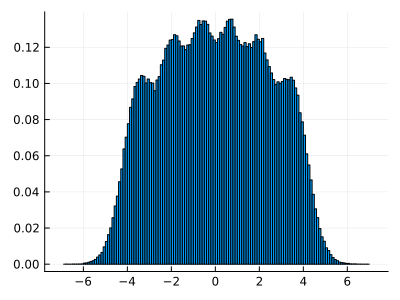

In [28]:
histogram(try_GUE, size = (400,300) ,normalize=:pdf, label=false)

grids from -6 to 6

In [29]:
ogrids = -6:0.02:6
grids = ogrids[2:end-1]

-5.98:0.02:5.98

In [30]:
function partialx(M)
    return (M[3:end, 2:end-1] - M[1:end-2, 2:end-1])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialy(M)
    return (M[2:end-1, 3:end] - M[2:end-1, 1:end-2])/2/(ogrids[2] - ogrids[1]) ./ M[2:end-1, 2:end-1]
end
function partialxy(M)
    return (M[3:end, 3:end] + M[1:end-2, 1:end-2] - M[1:end-2, 3:end] - M[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2 ./ M[2:end-1, 2:end-1]
end

partialxy (generic function with 1 method)

In [98]:
copy_num = 5000
Eff = zeros(length(ogrids), length(ogrids))
Ef = zeros(length(ogrids))
for i = 1:copy_num
    A = randn(n,n) + im*randn(n,n)
    get_p = fromroots(eigvals(Hermitian((A+A')/2)))
    f = rand([-1,1]) * get_p.(ogrids)
    Ef = (Ef*(i-1) + f) / i
    ff = f .* (f)'
    Eff = (Eff*(i-1) + ff) / i
end

In [99]:
Ef

601-element Vector{Float64}:
 -977.1627253591784
 -957.7983690218459
 -938.7453790030053
 -919.9998565488075
 -901.5579385045506
 -883.4157971043272
 -865.5696397613643
 -848.0157088588383
 -830.7502815414061
 -813.7696695072718
    ⋮
   63.71717580623823
   63.32883848764498
   62.899717791788454
   62.4287458767146
   61.91483863528265
   61.35689554955126
   60.75379954457637
   60.10441684161355
   59.40759681068364

In [100]:
Eff = Eff - Ef .* Ef' # with this or without

In [101]:
logEff = log.((Complex.(Eff)))
logEff = Hermitian(logEff)
K = .√((logEff[3:end, 3:end] + logEff[1:end-2, 1:end-2] - logEff[1:end-2, 3:end] - logEff[3:end, 1:end-2]) /4 /(ogrids[2] - ogrids[1])^2) *
   (grids[2] - grids[1]) / π # correct normalization
#K = .√(partialxy(Eff) .- partialx(Eff) .* partialy(Eff)) / π * (grids[2] - grids[1])

599×599 Matrix{ComplexF64}:
 0.000814692+0.0im  0.000819395+0.0im  …  0.000657952+0.0im
 0.000819395+0.0im  0.000824124+0.0im     0.000661413+0.0im
 0.000824159+0.0im  0.000828913+0.0im     0.000664921+0.0im
 0.000828984+0.0im  0.000833764+0.0im     0.000668477+0.0im
 0.000833871+0.0im  0.000838678+0.0im     0.000672083+0.0im
 0.000838823+0.0im  0.000843656+0.0im  …  0.000675738+0.0im
 0.000843841+0.0im  0.000848701+0.0im     0.000679446+0.0im
 0.000848925+0.0im  0.000853812+0.0im     0.000683207+0.0im
 0.000854078+0.0im  0.000858993+0.0im     0.000687022+0.0im
   0.0008593+0.0im  0.000864243+0.0im     0.000690892+0.0im
            ⋮                          ⋱  
 0.000687812+0.0im  0.000691419+0.0im  …  0.000843877+0.0im
 0.000683891+0.0im  0.000687478+0.0im     0.000838904+0.0im
 0.000680026+0.0im  0.000683595+0.0im     0.000833994+0.0im
 0.000676217+0.0im  0.000679767+0.0im     0.000829149+0.0im
 0.000672461+0.0im  0.000675993+0.0im     0.000824365+0.0im
 0.000668758+0.0im  0.0006722

In [102]:
Λ, Q = eigen(K)
tr(K)

3.8022272149988545 + 0.0im

In [103]:
#0.8955044955055671, 1
#1.5283230507288368, 2
#2.1102178359823873, 3
#2.7213506349113645, 4
#3.2389773015114853, 5
#3.7749715242911313, 6
#4.382451985280821, 7
#4.966556137020364, 8

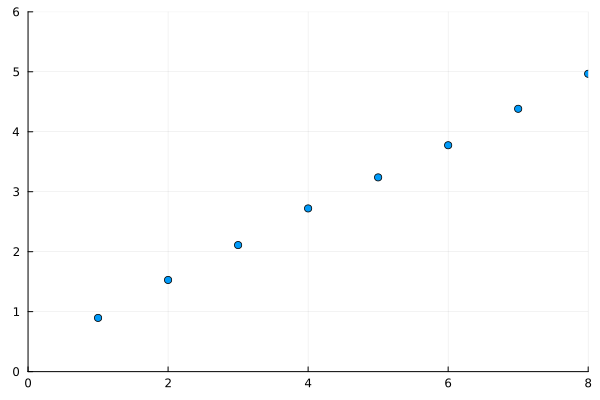

In [104]:
scatter([i for i in 1:8], [.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613],
    xlims = (0.0,8.0),
    ylims = (0, 6.0),
    label = false)

In [105]:
[.8955044955055671,1.5283230507288,2.11021783,2.7213506,3.238977301,3.77497152,4.38245198,4.96655613] ./[i for i in 1:8]

8-element Vector{Float64}:
 0.8955044955055671
 0.7641615253644
 0.7034059433333333
 0.68033765
 0.6477954602
 0.6291619199999999
 0.6260645685714286
 0.62081951625

In [106]:
Λ

599-element Vector{ComplexF64}:
   -2.88068714035982 - 0.5529079104444294im
  -2.829399951595903 + 0.3224266244071893im
 -2.7370323202268327 - 0.4757817528515083im
 -2.6596870871046194 - 0.2366874546612425im
  -2.573413150105675 - 0.4219885792261867im
  -2.427934361158088 - 0.8543363713985355im
 -2.4033010036080666 + 0.25207233860654876im
   -2.38974730564041 + 0.22651178060890664im
 -2.3637914827472617 + 0.43121426006184677im
  -2.343722106385033 - 0.4636715406412483im
                     ⋮
  2.4596075061342764 - 0.4650276594743604im
   2.490053356775069 - 0.293364444354615im
  2.6062624642180316 + 1.0856121488817112im
    2.90955505314296 + 0.9990794825874854im
  4.1563198094312215 + 1.3869979513346213im
   4.422303404655029 + 1.259672636274317im
   7.040522176070626 + 1.0665812335435856im
   7.474997132850346 + 2.055525060706972im
  15.413991730585316 + 1.637233736685329im

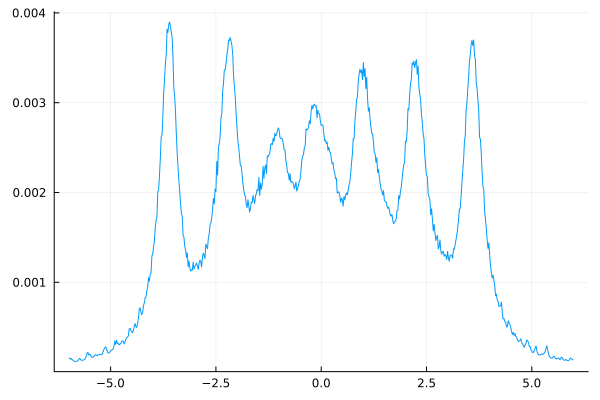

In [107]:
plot(grids, abs.(Q[:,end]).^2, label = false)